In [128]:
import mdtraj
import numpy as np
file_name = '/home/jiangdapeng/PepGLAD/results/fixseq/references/1bjr_ref.pdb'

# MDtraj
traj = mdtraj.load(file_name)
# SS calculation
pdb_ss = mdtraj.compute_dssp(traj, simplified=True)[0]  # (L, )

ss_count = {
    'alpha': np.sum(pdb_ss == 'H'),
    'beta': np.sum(pdb_ss == 'E'),
}
print("ss_count", ss_count)

OSError: No such file: /home/jiangdapeng/PepGLAD/results/fixseq/references/1bjr_ref.pdb

In [17]:
# 获取拓扑对象
topology = traj.topology

# 遍历链并打印编号和链的名称
for chain in topology.chains:
    print(f"链编号: {chain.index}")

链编号: 0
链编号: 1


In [2]:
import mdtraj as md
import numpy as np

file_name = '/home/jiangdapeng/PepGLAD/results/attn_codesign/candidates/1bjr/1bjr_gen_0.pdb'

# Load the PDB file and select chain B
traj = md.load(file_name)
topology = traj.topology
chain_B_atoms = topology.select("chainid == 1")  # 通常 PDB 文件中的链从 0 开始编号，这里假设链B的编号为1

# Slice the trajectory to only include chain B
traj_chain_B = traj.atom_slice(chain_B_atoms)

# Compute secondary structure for chain B
pdb_ss = md.compute_dssp(traj_chain_B, simplified=False)[0]  # (L, )

# Count the secondary structure elements
ss_count = {
    'alpha': np.sum(pdb_ss == 'H'),
    'beta': np.sum(pdb_ss == 'E'),
}
print("ss_count for chain B", ss_count)
print("pdb_ss for chain B", pdb_ss)

ss_count for chain B {'alpha': 0, 'beta': 0}
pdb_ss for chain B [' ' ' ' ' ' 'S' 'S' 'S' ' ' ' ' ' ' ' ']


In [4]:
import numpy as np
import os
import mdtraj as md
# directory = '/home/jiangdapeng/PepGLAD/results/attn_codesign/candidates'
directory = '/home/jiangdapeng/PepGLAD/results/alpha_4/candidates'
strcture_count = 0
peptide_count = 0

for root, dirs, files in os.walk(directory):
    for file in files:
        file_name = os.path.join(root, file)
        traj = md.load(file_name)
        topology = traj.topology
        chain_B_atoms = topology.select("chainid == 1")  # 通常 PDB 文件中的链从 0 开始编号，这里假设链B的编号为1

        # Slice the trajectory to only include chain B
        traj_chain_B = traj.atom_slice(chain_B_atoms)

        # Compute secondary structure for chain B
        pdb_ss = md.compute_dssp(traj_chain_B, simplified=False)[0]  # (L, )

        # Count the secondary structure elements
        ss_count = {
        'alpha': np.sum(pdb_ss == 'H'),
        'beta': np.sum(pdb_ss == 'E'),
        }
        if ss_count['alpha']!=0:
            print(file_name)
            print("ss_count for chain B", ss_count)
            strcture_count+=ss_count['alpha']
        peptide_count +=1
print(f'average structure{strcture_count/peptide_count}')

/home/jiangdapeng/PepGLAD/results/alpha_4/candidates/5vao/5vao_gen_1.pdb
ss_count for chain B {'alpha': 4, 'beta': 0}
/home/jiangdapeng/PepGLAD/results/alpha_4/candidates/2xyi/2xyi_gen_0.pdb
ss_count for chain B {'alpha': 4, 'beta': 0}
/home/jiangdapeng/PepGLAD/results/alpha_4/candidates/1t5z/1t5z_gen_1.pdb
ss_count for chain B {'alpha': 4, 'beta': 0}
/home/jiangdapeng/PepGLAD/results/alpha_4/candidates/4rs9/4rs9_gen_1.pdb
ss_count for chain B {'alpha': 4, 'beta': 0}
/home/jiangdapeng/PepGLAD/results/alpha_4/candidates/3r42/3r42_gen_0.pdb
ss_count for chain B {'alpha': 5, 'beta': 0}
/home/jiangdapeng/PepGLAD/results/alpha_4/candidates/3r7g/3r7g_gen_1.pdb
ss_count for chain B {'alpha': 8, 'beta': 0}
/home/jiangdapeng/PepGLAD/results/alpha_4/candidates/3r7g/3r7g_gen_0.pdb
ss_count for chain B {'alpha': 4, 'beta': 0}
/home/jiangdapeng/PepGLAD/results/alpha_4/candidates/4cy3/4cy3_gen_0.pdb
ss_count for chain B {'alpha': 4, 'beta': 0}
/home/jiangdapeng/PepGLAD/results/alpha_4/candidates/2hw

In [7]:
from transformers import AutoTokenizer, AutoModel

model = AutoModel.from_pretrained("/data/private/jdp/scibert")
tokz = AutoTokenizer.from_pretrained("/data/private/jdp/scibert")

output_list = []
for i in range(0,40):
    inputs = tokz(f"The peptide has {i} alpha helices.", return_tensors="pt")
    outputs = model(**inputs)
    output_list.append(outputs['pooler_output'])

/data/private/jdp/envs/PepGLAD/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:

from Bio import PDB

# 读取PDB文件
pdb_file = "/home/jiangdapeng/PepGLAD/results/prompt_codesign/candidates/6fq4/6fq4_gen_0.pdb"
parser = PDB.PDBParser(QUIET=True)
structure = parser.get_structure("protein", pdb_file)

chain_info = []
 
for model in structure:
    for chain in model:
        chain_id = chain.id
        sequence = []
        for residue in chain:
            if PDB.is_aa(residue, standard=True):  # 检查是否是标准氨基酸
                sequence.append(three_to_one(residue.resname))  # 转换三字母代码到单字母代码
        # 提取链的序列和长度
        seq_str = ''.join(sequence)
        chain_length = len(sequence)
        chain_info.append((chain_id, chain_length, seq_str))
 
# 打印链的信息
for chain_id, chain_length, seq_str in chain_info:
    print(f"链ID: {chain_id}, 长度: {chain_length}, 序列: {seq_str}")


链ID: A, 长度: 252, 序列: MPVFHTRTIESILEPVAQQISHLVIMHEEGEVDGKAIPDLTAPVSAVQAAVSNLVRVGKETVQTTEDQILKRDMPPAFIKVENACTKLVRAAQMLQADPYSVPARDYLIDGSRGILSGTSDLLLTFDEAEVRKIIRVCKGILEYLTVAEVVETMEDLVTYTKNLGPGMTKMAKMIDERQQELTHQEHRVMLVNSMNTVKELLPVLISAMKIFVTTKNTKSQGIEEALKNRNFTVEKMSAEINEIIRVLQLTS
链ID: B, 长度: 16, 序列: EVENEKDEVGFAYFQT


In [ ]:
# code to calculate the left hand side 

import numpy as np
import os
import mdtraj as md
from Bio import PDB
import json
# directory = '/home/jiangdapeng/PepGLAD/results/attn_codesign/candidates'
# 手动定义三字母代码到单字母代码的映射
three_to_one_map= {
    'ALA': 'A', 'CYS': 'C', 'ASP': 'D', 'GLU': 'E', 'PHE': 'F',
    'GLY': 'G', 'HIS': 'H', 'ILE': 'I', 'LYS': 'K', 'LEU': 'L',
    'MET': 'M', 'ASN': 'N', 'PRO': 'P', 'GLN': 'Q', 'ARG': 'R',
    'SER': 'S', 'THR': 'T', 'VAL': 'V', 'TRP': 'W', 'TYR': 'Y'
}
def three_to_one(residue_name):
    return three_to_one_map.get(residue_name, 'X')  # 使用 'X' 处理未知残基
directory = '/home/jiangdapeng/PepGLAD/results/debug_version_left_hand_R_170/results.jsonl'
with open('data.json', 'r', encoding='utf-8') as f:
    data = json.load(directory)
strcture_count = 0
peptide_count = 0
chain_info = []
counter = 0
total_counter = 0
for root, dirs, files in os.walk(directory):
    for file in files:
        pdb_file = os.path.join(root, file)
        parser = PDB.PDBParser(QUIET=True)
        structure = parser.get_structure("protein", pdb_file)
        total_counter=total_counter+1
        model = structure[0]
        for idx,chain in enumerate(model):
            if idx==0:
                continue
            chain_id = chain.id
            sequence = []
            for residue in chain:
                if PDB.is_aa(residue, standard=True):  # 检查是否是标准氨基酸
                    sequence.append(three_to_one(residue.resname))  # 转换三字母代码到单字母代码
            # 提取链的序列和长度
            seq_str = ''.join(sequence)
            print(f'{seq_str},generate by {file}')
            if seq_str[0] == 'R': 
                counter=counter+1
            chain_length = len(sequence)
            chain_info.append((chain_id, chain_length, seq_str))

print(counter)
print(total_counter)

KeyError: 0

In [21]:
import json
directory = '/home/jiangdapeng/PepGLAD/results/ht_5_3/results.jsonl'
counter = 0
total_counter = 0
with open(directory, 'r', encoding='utf-8') as f:
    for line in f:
        # 跳过空行
        if line.strip():
            # 将每行解析为 JSON 对象
            json_object = json.loads(line)
            peptide = json_object['gen_seq']
            if len(peptide)<4:
                continue
            total_counter = total_counter+1
            if peptide[3] == 'C': 
                counter=counter+1
print(counter)
print(total_counter)
            



108
160


In [16]:
import json
import numpy as np
import os
import mdtraj as md
directory = '/home/jiangdapeng/PepGLAD/results/ht_5_3/results.jsonl'
counter = 0
total_counter = 0
with open(directory, 'r', encoding='utf-8') as f:
    for line in f:
        # 跳过空行
        if line.strip():
            # 将每行解析为 JSON 对象
            json_object = json.loads(line)
            peptide_path = json_object['gen_pdb']
            total_counter = total_counter+1

            traj = md.load(peptide_path)
            topology = traj.topology
            chain_B_atoms = topology.select("chainid == 1")

            # Slice the trajectory to only include chain B
            traj_chain_B = traj.atom_slice(chain_B_atoms)

            # Compute secondary structure for chain B
            pdb_ss = md.compute_dssp(traj_chain_B, simplified=False)[0]  # (L, )

            # Count the secondary structure elements
            ss_count = {
            'alpha': np.sum(pdb_ss == 'H'),
            'beta': np.sum(pdb_ss == 'E'),
            }
            if ss_count['alpha']!=0:
                number = ss_count['alpha']
                print(f'The number of alpha helices are {number}')
            if ss_count['alpha']==4:
                counter=counter+1
print(counter)
print(total_counter)

The number of alpha helices are 4
The number of alpha helices are 4
The number of alpha helices are 4
The number of alpha helices are 8
The number of alpha helices are 4
The number of alpha helices are 4
The number of alpha helices are 4
The number of alpha helices are 5
The number of alpha helices are 4
The number of alpha helices are 4
The number of alpha helices are 4
The number of alpha helices are 4
The number of alpha helices are 5
The number of alpha helices are 4
The number of alpha helices are 4
The number of alpha helices are 5
The number of alpha helices are 8
The number of alpha helices are 4
The number of alpha helices are 4
14
172


In [133]:
#Condition 1
all_peptide_list = []
meet_peptide_list = []
import json
import numpy as np
import os
from Bio.PDB import PDBParser
import mdtraj as md
directory = '/home/jiangdapeng/PepGLAD/results/condition1_w5_5samples/results.jsonl'
counter = 0
counter2 = 0
counter3 = 0
total_counter = 0
distance_list = []
with open(directory, 'r', encoding='utf-8') as f:
    for line in f:
        # 跳过空行
        if line.strip():
            # 将每行解析为 JSON 对象
            json_object = json.loads(line)
            id = json_object['id']
            peptide_path = json_object['gen_pdb']
            peptide = json_object['gen_seq']
            parser = PDBParser(QUIET=True)
            structure = parser.get_structure('peptide', peptide_path)
            chain = structure[0][json_object['lig_chain']]  # 假设只取第一个模型和指定的链
            residues = list(chain.get_residues())
            if len(peptide)<5:
                continue
            if id not in all_peptide_list:
                all_peptide_list.append(id)
            total_counter=total_counter+1
            flag=0
            flag_distance = 0
            counter2_flag = 0
            for i in range(0,len(residues)-4):
                atom1 = residues[i]['C']  
                atom2 = residues[i+3]['C'] 
                atom3 = residues[i+4]['C'] 
                # 计算欧几里得距离
                distance1 = np.linalg.norm(atom1.coord - atom2.coord)
                distance2 = np.linalg.norm(atom1.coord - atom3.coord)
                if peptide[i] == 'K':
                    if ((peptide[i+3] == 'D' or peptide[i+3] == 'E') and (4<distance1<6.5)) or ((peptide[i+4] == 'D' or peptide[i+4] == 'E') and (4<distance2<6.5)): 
                        counter2_flag=1
                        if id not in meet_peptide_list:
                            meet_peptide_list.append(id)
            counter2+=counter2_flag
print(f'total samples:{total_counter}')
print(f'meet the requirement Cys: {counter2}')
print(len(meet_peptide_list))
print(len(all_peptide_list))


total samples:350
meet the requirement Cys: 34
27
70


In [150]:
# Condition 2
all_peptide_list = []
meet_peptide_dic2 = {}
meet_peptide_dic_path2 = {}
import json
import numpy as np
import os
from Bio.PDB import PDBParser
import mdtraj as md
directory = '/home/jiangdapeng/PepGLAD/results/condition2_w5_5samples/results.jsonl'
counter = 0
counter2 = 0
counter3 = 0
total_counter = 0
distance_list = []
with open(directory, 'r', encoding='utf-8') as f:
    for line in f:
        # 跳过空行
        if line.strip():
            # 将每行解析为 JSON 对象
            json_object = json.loads(line)
            id = json_object['id']
            if id not in all_peptide_list:
                all_peptide_list.append(id)
            peptide_path = json_object['gen_pdb']
            peptide = json_object['gen_seq']
            parser = PDBParser(QUIET=True)
            structure = parser.get_structure('peptide', peptide_path)
            chain = structure[0][json_object['lig_chain']]  # 假设只取第一个模型和指定的链
            residues = list(chain.get_residues())
            total_counter=total_counter+1
            first_atom = residues[0]['C']  # N端的氮原子
            last_atom = residues[-1]['C']   # C端的羧基碳原子
            # 计算欧几里得距离
            distance = np.linalg.norm(first_atom.coord - last_atom.coord)
            distance_list.append(distance)
            if distance<5:
                if id not in meet_peptide_dic2.keys():
                    meet_peptide_dic2[id] = 1
                    meet_peptide_dic_path2[id] = [peptide_path]
                else:
                    meet_peptide_dic2[id] += 1
                    meet_peptide_dic_path2[id].append(peptide_path)
                counter+=1

print(f'mean distance is {np.mean(distance_list)}')
print(f'meet the requirement Distance: {counter}')
print(f'total samples:{total_counter}')
print(len(meet_peptide_dic2.keys()))
print(len(all_peptide_list))

mean distance is 6.474010467529297
meet the requirement Distance: 170
total samples:430
64
86


In [151]:
#Condition 3
import json
import numpy as np
import os
from Bio.PDB import PDBParser
import mdtraj as md
all_peptide_list = []
meet_peptide_dic3 = {}
meet_peptide_dic_path3 = {}
directory = '/home/jiangdapeng/PepGLAD/results/condition3_w5_5samples/results.jsonl'
counter = 0
counter2 = 0
counter3 = 0
total_counter = 0
distance_list = []
with open(directory, 'r', encoding='utf-8') as f:
    for line in f:
        # 跳过空行
        if line.strip():
            # 将每行解析为 JSON 对象
            json_object = json.loads(line)
            peptide_path = json_object['gen_pdb']
            peptide = json_object['gen_seq']
            id = json_object['id']
            parser = PDBParser(QUIET=True)
            structure = parser.get_structure('peptide', peptide_path)
            chain = structure[0][json_object['lig_chain']]  # 假设只取第一个模型和指定的链
            residues = list(chain.get_residues())
            if len(peptide)<4:
                continue
            if id not in all_peptide_list:
                all_peptide_list.append(id)
            total_counter=total_counter+1
            flag=0
            flag_distance = 0
            counter2_flag = 0
            for i in range(0,len(residues)):
                for j in range(i+1,len(residues)):
                    flag1=False
                    flag2 = False
                    first_atom = residues[i]['C']  # N端的氮原子
                    last_atom = residues[j]['C']   # C端的羧基碳原子
                    # 计算欧几里得距离
                    distance = np.linalg.norm(first_atom.coord - last_atom.coord)
                    distance_list.append(distance)
                    if distance<6:
                        flag1 = True
                        flag_distance=1
                    if peptide[i] == 'C' and peptide[j] == 'C': 
                        counter2_flag=1
                        flag2 = True
                    if flag1&flag2:
                        flag=1
                        if id not in meet_peptide_dic3.keys():
                            meet_peptide_dic3[id] = 1
                            meet_peptide_dic_path3[id] = [peptide_path]
                        else:
                            meet_peptide_dic3[id] += 1
                            meet_peptide_dic_path3[id].append(peptide_path)
            counter2+=counter2_flag
            counter3+=flag
            counter+=flag_distance

print(f'mean distance is {np.mean(distance_list)}')
print(f'meet the requirement Distance: {counter}')
print(f'total samples:{total_counter}')
print(f'meet the requirement Cys: {counter2}')
print(f'meet the requirement all: {counter3}')
print(len(all_peptide_list))
print(len(meet_peptide_dic3.keys()))
# print(interst_path)



mean distance is 11.887428283691406
meet the requirement Distance: 372
total samples:400
meet the requirement Cys: 312
meet the requirement all: 292
80
66


In [152]:
#Condition 4
import json
import numpy as np
import os
from Bio.PDB import PDBParser
import mdtraj as md
directory = '/home/jiangdapeng/PepGLAD/results/condition4_w5_5samples/results.jsonl'
counter = 0
counter2 = 0
counter3 = 0
total_counter = 0
all_peptide_list = []
meet_peptide_dic4 = {}
meet_peptide_dic_path4 = {}
with open(directory, 'r', encoding='utf-8') as f:
    for line in f:
        # 跳过空行
        if line.strip():
            # 将每行解析为 JSON 对象
            json_object = json.loads(line)
            peptide_path = json_object['gen_pdb']
            peptide = json_object['gen_seq']
            id = json_object['id']
            parser = PDBParser(QUIET=True)
            structure = parser.get_structure('peptide', peptide_path)
            chain = structure[0][json_object['lig_chain']]  # 假设只取第一个模型和指定的链
            residues = list(chain.get_residues())
            if len(peptide)<13:
                continue
            if id not in all_peptide_list:
                all_peptide_list.append(id)
            total_counter=total_counter+1
            
            flag=0
            flag_distance = 0
            counter2_flag = 0
            for i in range(0,len(residues)):
                for j in range(i+1,len(residues)):
                    for k in range(j+1,len(residues)):
                        flag1=False
                        flag2 = False
                        atom1 = residues[i]['C'] 
                        atom2 = residues[j]['C'] 
                        atom3 = residues[k]['C']
                        # 计算欧几里得距离
                        distance1 = np.linalg.norm(atom1.coord - atom2.coord)
                        distance2 = np.linalg.norm(atom2.coord - atom3.coord)
                        distance3 = np.linalg.norm(atom3.coord - atom1.coord)
                        if distance1<10 and distance2<10 and distance3<10:
                            flag1 = True
                        if peptide[i] == 'C' and peptide[j] == 'C' and peptide[k] == 'C': 
                            counter2_flag = 1
                            flag2 = True
                        if flag1&flag2:
                            flag=1
                            if id not in meet_peptide_dic4.keys():
                                meet_peptide_dic4[id] = 1
                                meet_peptide_dic_path4[id] = [peptide_path]
                            else:
                                meet_peptide_dic4[id] += 1
                                meet_peptide_dic_path4[id].append(peptide_path)
            counter2+=counter2_flag
            counter3+=flag
            counter+=flag_distance

print(f'total samples:{total_counter}')
print(f'meet the requirement Cys: {counter2}')
print(f'meet the requirement all: {counter3}')
print(len(all_peptide_list))
print(len(meet_peptide_dic4.keys()))

total samples:130
meet the requirement Cys: 95
meet the requirement all: 89
26
22


In [153]:
meet_peptide_dic4.keys()

dict_keys(['1fiw', '1t3l', '2cnz', '2f31', '2np0', '2v8x', '2xyi', '3c3o', '3r7g', '3ro3', '3wbn', '4cu4', '4k0u', '4rs9', '5a29', '5frs', '5l9b', '5yc2', '6fq4', '2hwl', '2z5n', '1ee5'])

In [123]:

import os
from Bio.PDB import PDBParser
import pandas as pd
from tqdm import tqdm

min_length = 5
# 初始化氨基酸计数列表（假设有20种标准氨基酸）
gt_condition_acid_list = [0] * 20
amino_acid_map = {
    'ALA': 1, 'ARG': 2, 'ASN': 3, 'ASP': 4, 'CYS': 5,
    'GLN': 6, 'GLU': 7, 'GLY': 8, 'HIS': 9, 'ILE': 10,
    'LEU': 11, 'LYS': 12, 'MET': 13, 'PHE': 14, 'PRO': 15,
    'SER': 16, 'THR': 17, 'TRP': 18, 'TYR': 19, 'VAL': 20
}

file_path = '/data/private/jdp/PepGLAD/datasets/train_valid/all.txt'
df = pd.read_csv(file_path, sep='\t', header=None, names=['index', 'protein_id', 'peptide_id', 'label'])
df.set_index('index', inplace=True)

# 筛选 label 为 0 的行
df = df[df['label'] == 0]
for idx in tqdm(df.index):
    peptide_path = os.path.join('/data/private/jdp/PepGLAD/datasets/train_valid/pdbs', idx + '.pdb')
    if not os.path.exists(peptide_path):
        print(f"File not found: {peptide_path}")
        continue
    parser = PDBParser(QUIET=True)
    try:
        structure = parser.get_structure('peptide', peptide_path)
    except Exception as e:
        print(f"Error parsing {peptide_path}: {e}")
        continue
    peptide_id = df.loc[idx, 'peptide_id']
    try:
        chain = structure[0][peptide_id]
    except KeyError:
        print(f"Chain {peptide_id} not found in {peptide_path}")
        continue

    residues = list(chain.get_residues())

    if len(residues) < min_length:
        continue

    for res in residues:
        resname = res.get_resname() 
        if resname in amino_acid_map:
            gt_condition_acid_list[amino_acid_map[resname] - 1] += 1
        else:
            print(f"Unknown residue {resname} in {peptide_path}")

file_path = '/data/private/jdp/PepGLAD/datasets/LNR/test.txt'
df = pd.read_csv(file_path, sep='\t', header=None, names=['index', 'protein_id', 'peptide_id', 'label'])
df.set_index('index', inplace=True)

# 筛选 label 为 0 的行
df = df[df['label'] == 0]
for idx in tqdm(df.index):
    peptide_path = os.path.join('/data/private/jdp/PepGLAD/datasets/LNR/pdbs', idx + '.pdb')
    if not os.path.exists(peptide_path):
        print(f"File not found: {peptide_path}")
        continue
    parser = PDBParser(QUIET=True)
    try:
        structure = parser.get_structure('peptide', peptide_path)
    except Exception as e:
        print(f"Error parsing {peptide_path}: {e}")
        continue
    peptide_id = df.loc[idx, 'peptide_id']
    try:
        chain = structure[0][peptide_id]
    except KeyError:
        print(f"Chain {peptide_id} not found in {peptide_path}")
        continue

    residues = list(chain.get_residues())

    if len(residues) < min_length:
        continue

    for res in residues:
        resname = res.get_resname() 
        if resname in amino_acid_map:
            gt_condition_acid_list[amino_acid_map[resname] - 1] += 1
        else:
            print(f"Unknown residue {resname} in {peptide_path}")
print("Final amino acid counts:", gt_condition_acid_list)

    

    

  6%|▋         | 6/93 [00:00<00:03, 27.27it/s]

Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/1bjr.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/1d4t.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/1d4t.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/1d4t.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/1d4t.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/1d4t.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/1d4t.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/1d4t.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/1d4t.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/1d4t.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/1d4t.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/1d4t.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/1d4t.pdb
Unknown resi

 16%|█▌        | 15/93 [00:00<00:02, 36.19it/s]

Unknown residue SO4 in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/1ky6.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/1ky6.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/1ky6.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/1ky6.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/1ky6.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/1ky6.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/1ky6.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/1ky6.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/1ky6.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/1ssc.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/1ssc.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/1ssc.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/1ssc.pdb
Unknown resi

 20%|██        | 19/93 [00:01<00:05, 12.40it/s]

Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/2fib.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/2hwl.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/2hwl.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/2hwl.pdb


 25%|██▍       | 23/93 [00:01<00:04, 15.36it/s]

Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/2orz.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/2orz.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/2orz.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/2orz.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/2orz.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/2orz.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/2qa9.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/2qa9.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/2qa9.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/2qa9.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/2qa9.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/2qa9.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/2qa9.pdb
Unknown resi

 28%|██▊       | 26/93 [00:01<00:04, 15.95it/s]

Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/2x72.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/2x72.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/2xyi.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/2xyi.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/2xyi.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/2xyi.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/2xyi.pdb


 33%|███▎      | 31/93 [00:02<00:05, 10.65it/s]

Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/2z9i.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/2z9i.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/3ayu.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/3ayu.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/3ayu.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/3ayu.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/3ayu.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/3ayu.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/3ayu.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/3ayu.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/3ayu.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/3ayu.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/3ayu.pdb
Unknown resi

 37%|███▋      | 34/93 [00:02<00:04, 12.89it/s]

Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/3cvl.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/3cvl.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/3dnj.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/3dnj.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/3n2d.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/3n2d.pdb


 44%|████▍     | 41/93 [00:02<00:02, 19.42it/s]

Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/3pkn.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/3pkn.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/3pkn.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/3pkn.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/3pkn.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/3pkn.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/3pkn.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/3r42.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/3r42.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/3r42.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/3r42.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/3r42.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/3r42.pdb
Unknown resi

 47%|████▋     | 44/93 [00:02<00:02, 20.13it/s]

Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/3ufm.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/3ufm.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/3ufm.pdb


 55%|█████▍    | 51/93 [00:03<00:03, 11.80it/s]

Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/4cu4.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/4cy3.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/4cy3.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/4cy3.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/4cy3.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/4cy3.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/4cy3.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/4cy3.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/4fvd.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/4fvd.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/4j86.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/4j86.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/4j86.pdb
Unknown resi

 58%|█████▊    | 54/93 [00:03<00:02, 14.61it/s]

Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/4k0u.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/4ka7.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/4ka7.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/4ka7.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/4ka7.pdb
Unknown residue SO4 in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/4mn8.pdb


 65%|██████▍   | 60/93 [00:04<00:03,  9.28it/s]

Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/4piq.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/4piq.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/4piq.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/4piq.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/4piq.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/4piq.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/4piq.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/4rs9.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/4rs9.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/4rs9.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/4rs9.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/4rs9.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/4rs9.pdb
Unknown resi

 67%|██████▋   | 62/93 [00:04<00:03,  9.79it/s]

Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/4w50.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/4w50.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/4w50.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/4w50.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/4w50.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/4x3h.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/4x3h.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/4x3h.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/4x3h.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/4x3h.pdb


 71%|███████   | 66/93 [00:05<00:02,  9.93it/s]

Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/4xob.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/4xob.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/4z2o.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/4z2o.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/4z2o.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/4z2o.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/4z2o.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/4z2o.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/4z2o.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/4z2o.pdb
Unknown residue SRT in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/5a29.pdb
Unknown residue SRT in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/5a29.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/5a29.pdb
Unknown resi

 75%|███████▌  | 70/93 [00:05<00:02,  7.78it/s]

Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/5fxc.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/5fxc.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/5fxc.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/5l9b.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/5l9b.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/5l9b.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/5l9b.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/5l9b.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/5l9b.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/5l9b.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/5l9b.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/5l9b.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/5l9b.pdb
Unknown resi

 81%|████████  | 75/93 [00:06<00:01, 10.30it/s]

Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/5njx.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/5njx.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/5njx.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/5onp.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/5onp.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/5onp.pdb


 84%|████████▍ | 78/93 [00:06<00:01, 12.03it/s]

Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/5wir.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/5wir.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/5yc2.pdb


 86%|████████▌ | 80/93 [00:06<00:01, 12.69it/s]

Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/6e3d.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/6e3d.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/6e3d.pdb


 91%|█████████▏| 85/93 [00:07<00:00,  8.42it/s]

Unknown residue ACE in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/6efk.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/6efk.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/6efk.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/6efk.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/6efk.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/6efk.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/6efk.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/6efk.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/6efk.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/6efk.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/6efk.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/6efk.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/6g86.pdb
Unknown resi

 97%|█████████▋| 90/93 [00:08<00:00,  8.34it/s]

Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/6j0x.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/6j0x.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/6j0x.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/6j0x.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/6j0x.pdb
Unknown residue UNX in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/6mlc.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/6n3e.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/6n3e.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/6n3e.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/6n3e.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/6n3e.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/6n3e.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/6n3e.pdb
Unknown resi

100%|██████████| 93/93 [00:08<00:00, 10.51it/s]

Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/6sa8.pdb
Unknown residue HOH in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/6sa8.pdb
Unknown residue ACE in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/6seo.pdb
Unknown residue NH2 in /data/private/jdp/PepGLAD/datasets/LNR/pdbs/6seo.pdb
Final amino acid counts: [3945, 3649, 2013, 2723, 778, 2051, 3339, 3028, 1016, 2443, 5125, 3242, 1082, 2168, 3690, 3392, 2692, 914, 1745, 2757]


In [138]:
#Calculate the KL acid type
import numpy as np
amino_acid_map = {
    'A': 1,  # Alanine
    'R': 2,  # Arginine
    'N': 3,  # Asparagine
    'D': 4,  # Aspartic acid
    'C': 5,  # Cysteine
    'E': 6,  # Glutamic acid
    'Q': 7,  # Glutamine
    'G': 8,  # Glycine
    'H': 9,  # Histidine
    'I': 10, # Isoleucine
    'L': 11, # Leucine
    'K': 12, # Lysine
    'M': 13, # Methionine
    'F': 14, # Phenylalanine
    'P': 15, # Proline
    'S': 16, # Serine
    'T': 17, # Threonine
    'W': 18, # Tryptophan
    'Y': 19, # Tyrosine
    'V': 20  # Valine
}
def kl_divergence(P, Q):
    # 归一化
    P = np.array(P) / np.sum(P)
    Q = np.array(Q) / np.sum(Q)
    
    # 确保Q中没有零值
    epsilon = 1e-10
    P = P + epsilon
    Q = Q + epsilon
    
    # 计算KL散度
    return np.sum(P * np.log(P / Q))

condition_acid_list = [0]*20
import json
import numpy as np
import os
from Bio.PDB import PDBParser
import mdtraj as md
condition_directory = '/home/jiangdapeng/PepGLAD/results/condition1_w2_5samples/results.jsonl'
with open(condition_directory, 'r', encoding='utf-8') as f:
    for line in f:
        # 跳过空行
        if line.strip():
            # 将每行解析为 JSON 对象
            json_object = json.loads(line)
            id = json_object['id']
            peptide_path = json_object['gen_pdb']
            peptide = json_object['gen_seq']
            parser = PDBParser(QUIET=True)
            structure = parser.get_structure('peptide', peptide_path)
            chain = structure[0][json_object['lig_chain']]  # 假设只取第一个模型和指定的链
            residues = list(chain.get_residues())
            if len(peptide)<5:
                continue
            for acid in peptide:
                condition_acid_list[amino_acid_map[acid]-1]+=1


gt1_condition_acid_list = [x for i, x in enumerate(gt_condition_acid_list) if i not in {3,5,11}]
condition1_acid_list = [x for i, x in enumerate(condition_acid_list) if i not in {3,5,11}]
kl_div = kl_divergence(gt1_condition_acid_list, condition1_acid_list)

print(kl_div)

0.10178941428275334


Total samples processed: 350


/tmp/ipykernel_58509/1008511675.py:87: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(bins, rotation=90)
/tmp/ipykernel_58509/1008511675.py:94: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(bins, rotation=90)


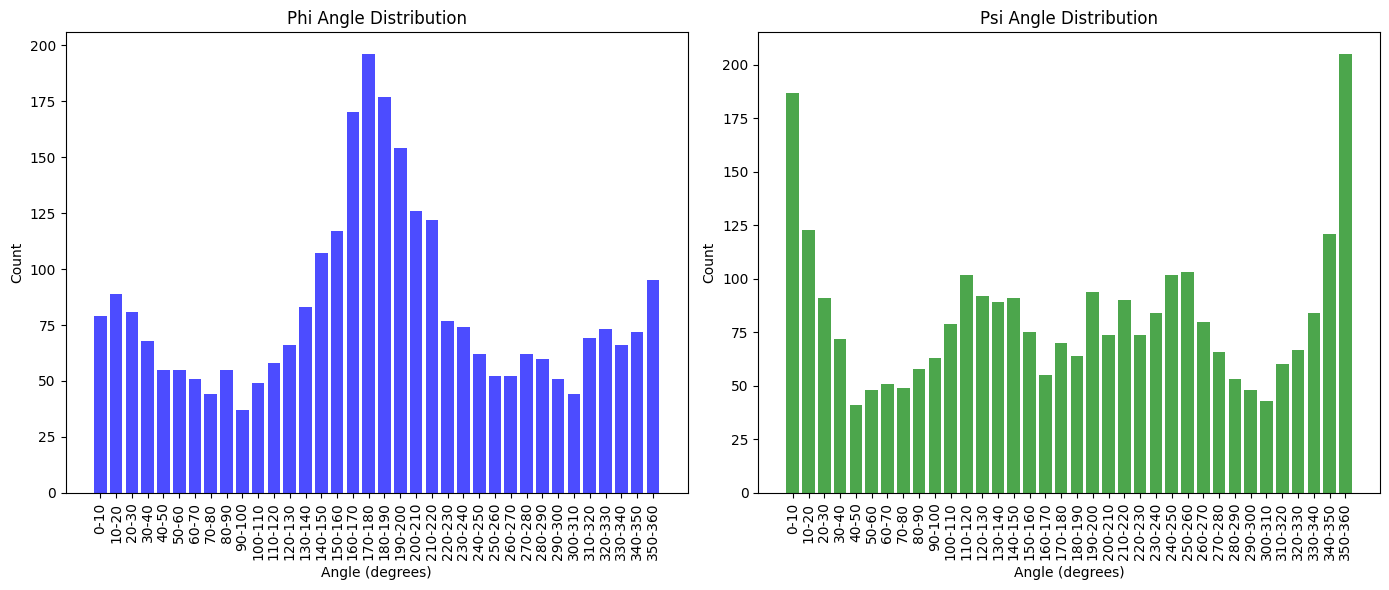

In [162]:
import json
import numpy as np
from Bio import PDB
import matplotlib.pyplot as plt
min_length = 5
# 文件夹路径
directory = '/home/jiangdapeng/PepGLAD/results/condition1_w2_5samples/results.jsonl'

# 初始化计数器
phi_counts_new = [0] * 36  # 对应phi角的区间
psi_counts_new = [0] * 36  # 对应psi角的区间
total_counter = 0  # 统计处理的总蛋白质数量

def degrees(rad_angle) :
    """Converts any angle in radians to degrees.

    If the input is None, then it returns None.
    For numerical input, the output is mapped to [0,360]
    """
    if rad_angle is None :
        return None
    angle = rad_angle * 180 / np.pi
    while angle > 180 :
        angle = angle - 360
    while angle < -180 :
        angle = angle + 360
    return angle+180
# 解析文件
with open(directory, 'r', encoding='utf-8') as f:
    for line in f:
        # 跳过空行
        if line.strip():
            # 将每行解析为 JSON 对象
            json_object = json.loads(line)
            peptide_path = json_object['gen_pdb']
            peptide = json_object['gen_seq']
            
            # 判断氨基酸序列长度
            if len(peptide) < min_length:
                continue
            
            total_counter += 1

            # 读取PDB文件
            parser = PDB.PDBParser(QUIET=True)
            structure = parser.get_structure('peptide', peptide_path)
            chain = structure[0][json_object['lig_chain']]  # 假设只取第一个模型和指定的链

            # 提取多肽链
            ppb = PDB.PPBuilder()
            polypeptides = ppb.build_peptides(chain)

            # 遍历每个多肽链的phi、psi二面角
            for poly in polypeptides:
                phi_psi_list = poly.get_phi_psi_list()  # 获取phi和psi角度列表
                for res_index, (phi, psi) in enumerate(phi_psi_list):
                    if phi is not None and psi is not None:
                        # 将角度转换为度
                        phi_deg = degrees(phi)
                        psi_deg = degrees(psi)
                        
                        # 计算phi和psi落在哪个区间（slut）
                        phi_index = int(phi_deg // 10)  # 计算区间索引 (-180到180，映射到0到18)
                        psi_index = int(psi_deg // 10)  # 计算区间索引 (-180到180，映射到0到18)
                        
                        # 更新对应区间的计数
                        if 0 <= phi_deg < 360:
                            phi_counts_new[phi_index] += 1
                        if 0 <= psi_deg < 360:
                            psi_counts_new[psi_index] += 1

# 打印结果
print(f"Total samples processed: {total_counter}")
# print(f"Phi angle distribution: {phi_counts_new}")
# print(f"Psi angle distribution: {psi_counts_new}")

# 可视化
bins = [f'{i*10}-{(i+1)*10}' for i in range(0, 36)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# 绘制phi分布
ax1.bar(bins, phi_counts_new, color='b', alpha=0.7)
ax1.set_title("Phi Angle Distribution")
ax1.set_xlabel("Angle (degrees)")
ax1.set_ylabel("Count")
ax1.set_xticklabels(bins, rotation=90)

# 绘制psi分布
ax2.bar(bins, psi_counts_new, color='g', alpha=0.7)
ax2.set_title("Psi Angle Distribution")
ax2.set_xlabel("Angle (degrees)")
ax2.set_ylabel("Count")
ax2.set_xticklabels(bins, rotation=90)

plt.tight_layout()
plt.show()



  0%|          | 0/4612 [00:00<?, ?it/s]

100%|██████████| 93/93 [00:07<00:00, 12.62it/s]
/tmp/ipykernel_58509/3429604937.py:139: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(bins, rotation=90)
/tmp/ipykernel_58509/3429604937.py:146: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(bins, rotation=90)


Total samples processed: 0
Phi angle distribution: [174, 361, 681, 1129, 1746, 2132, 2266, 2651, 3371, 4322, 6581, 9866, 4527, 738, 128, 35, 14, 11, 20, 4, 13, 52, 129, 353, 329, 284, 236, 130, 83, 61, 49, 37, 32, 48, 55, 94]
Psi angle distribution: [577, 276, 161, 92, 73, 72, 65, 57, 60, 87, 124, 334, 1191, 4783, 4032, 2058, 1561, 1089, 829, 566, 439, 365, 327, 284, 298, 335, 382, 542, 867, 1627, 3054, 4244, 4550, 3959, 2359, 1023]


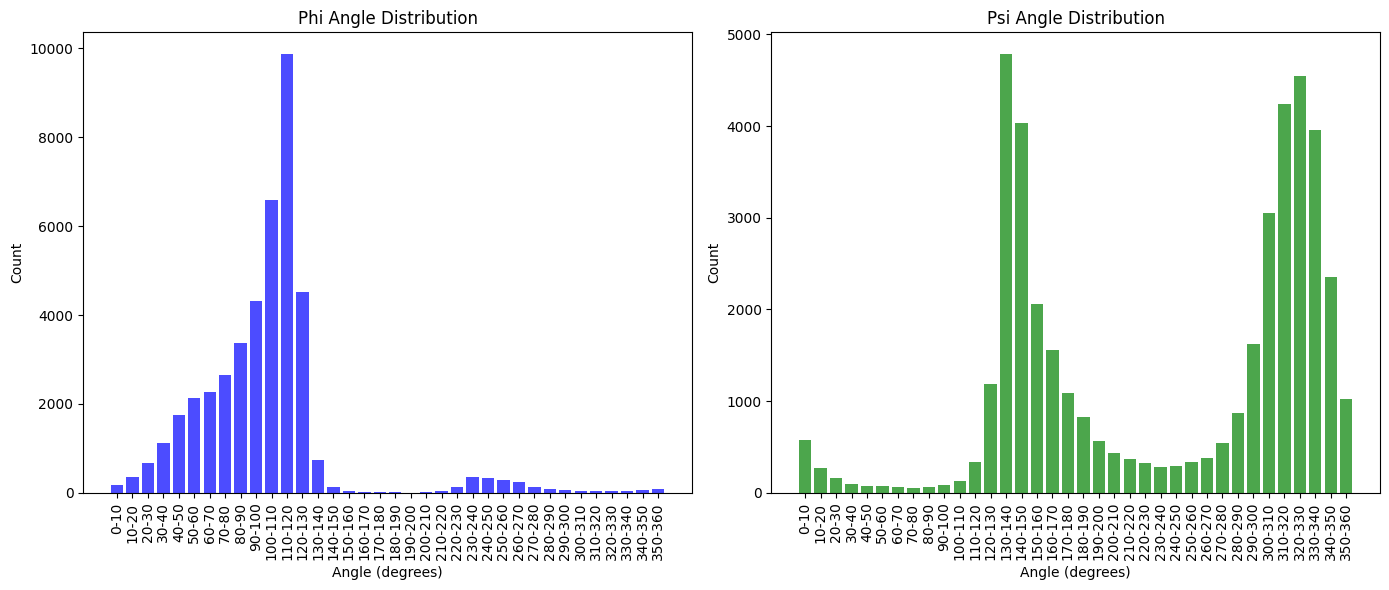

In [148]:
import json
import numpy as np
from Bio import PDB
import matplotlib.pyplot as plt
min_length = 5
phi_counts = [0] * 36  # 对应phi角的区间
psi_counts = [0] * 36  # 对应psi角的区间
total_counter = 0  # 统计处理的总蛋白质数量

def degrees(rad_angle) :
    """Converts any angle in radians to degrees.

    If the input is None, then it returns None.
    For numerical input, the output is mapped to [0,360]
    """
    if rad_angle is None :
        return None
    angle = rad_angle * 180 / np.pi
    while angle > 180 :
        angle = angle - 360
    while angle < -180 :
        angle = angle + 360
    return angle+180

file_path = '/data/private/jdp/PepGLAD/datasets/train_valid/all.txt'
df = pd.read_csv(file_path, sep='\t', header=None, names=['index', 'protein_id', 'peptide_id', 'label'])
df.set_index('index', inplace=True)

# 筛选 label 为 0 的行
df = df[df['label'] == 0]
for idx in tqdm(df.index):
    peptide_path = os.path.join('/data/private/jdp/PepGLAD/datasets/train_valid/pdbs', idx + '.pdb')
    if not os.path.exists(peptide_path):
        print(f"File not found: {peptide_path}")
        continue
    parser = PDBParser(QUIET=True)
    try:
        structure = parser.get_structure('peptide', peptide_path)
    except Exception as e:
        print(f"Error parsing {peptide_path}: {e}")
        continue
    peptide_id = df.loc[idx, 'peptide_id']
    try:
        chain = structure[0][peptide_id]
    except KeyError:
        print(f"Chain {peptide_id} not found in {peptide_path}")
        continue
    residues = list(chain.get_residues())
    if len(residues) < min_length:
        continue
    
    # 提取多肽链
    ppb = PDB.PPBuilder()
    polypeptides = ppb.build_peptides(chain)

    # 遍历每个多肽链的phi、psi二面角
    for poly in polypeptides:
        phi_psi_list = poly.get_phi_psi_list()  # 获取phi和psi角度列表
        for res_index, (phi, psi) in enumerate(phi_psi_list):
            if phi is not None and psi is not None:
                # 将角度转换为度
                phi_deg = degrees(phi)
                psi_deg = degrees(psi)
                
                # 计算phi和psi落在哪个区间（slut）
                phi_index = int(phi_deg // 10)  # 计算区间索引 (-180到180，映射到0到18)
                psi_index = int(psi_deg // 10)  # 计算区间索引 (-180到180，映射到0到18)
                
                # 更新对应区间的计数
                if 0 <= phi_deg < 360:
                    phi_counts[phi_index] += 1
                if 0 <= psi_deg < 360:
                    psi_counts[psi_index] += 1

file_path = '/data/private/jdp/PepGLAD/datasets/LNR/test.txt'
df = pd.read_csv(file_path, sep='\t', header=None, names=['index', 'protein_id', 'peptide_id', 'label'])
df.set_index('index', inplace=True)

# 筛选 label 为 0 的行
df = df[df['label'] == 0]
for idx in tqdm(df.index):
    peptide_path = os.path.join('/data/private/jdp/PepGLAD/datasets/LNR/pdbs', idx + '.pdb')
    if not os.path.exists(peptide_path):
        print(f"File not found: {peptide_path}")
        continue
    parser = PDBParser(QUIET=True)
    try:
        structure = parser.get_structure('peptide', peptide_path)
    except Exception as e:
        print(f"Error parsing {peptide_path}: {e}")
        continue
    peptide_id = df.loc[idx, 'peptide_id']
    try:
        chain = structure[0][peptide_id]
    except KeyError:
        print(f"Chain {peptide_id} not found in {peptide_path}")
        continue
    residues = list(chain.get_residues())
    if len(residues) < min_length:
        continue
    # 提取多肽链
    ppb = PDB.PPBuilder()
    polypeptides = ppb.build_peptides(chain)

    # 遍历每个多肽链的phi、psi二面角
    for poly in polypeptides:
        phi_psi_list = poly.get_phi_psi_list()  # 获取phi和psi角度列表
        for res_index, (phi, psi) in enumerate(phi_psi_list):
            if phi is not None and psi is not None:
                # 将角度转换为度
                phi_deg = degrees(phi)
                psi_deg = degrees(psi)
                
                # 计算phi和psi落在哪个区间（slut）
                phi_index = int(phi_deg // 10)  # 计算区间索引 (-180到180，映射到0到18)
                psi_index = int(psi_deg // 10)  # 计算区间索引 (-180到180，映射到0到18)
                
                # 更新对应区间的计数
                if 0 <= phi_deg < 360:
                    phi_counts[phi_index] += 1
                if 0 <= psi_deg < 360:
                    psi_counts[psi_index] += 1

# 打印结果
print(f"Total samples processed: {total_counter}")
print(f"Phi angle distribution: {phi_counts}")
print(f"Psi angle distribution: {psi_counts}")

# 可视化
bins = [f'{i*10}-{(i+1)*10}' for i in range(0, 36)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# 绘制phi分布
ax1.bar(bins, phi_counts, color='b', alpha=0.7)
ax1.set_title("Phi Angle Distribution")
ax1.set_xlabel("Angle (degrees)")
ax1.set_ylabel("Count")
ax1.set_xticklabels(bins, rotation=90)

# 绘制psi分布
ax2.bar(bins, psi_counts, color='g', alpha=0.7)
ax2.set_title("Psi Angle Distribution")
ax2.set_xlabel("Angle (degrees)")
ax2.set_ylabel("Count")
ax2.set_xticklabels(bins, rotation=90)

plt.tight_layout()
plt.show()

In [163]:
import numpy as np

def kl_divergence(P, Q):
    # 归一化
    P = np.array(P) / np.sum(P)
    Q = np.array(Q) / np.sum(Q)
    
    # 确保Q中没有零值
    epsilon = 1e-10
    P = P + epsilon
    Q = Q + epsilon
    
    # 计算KL散度
    return np.sum(P * np.log(P / Q))

# 计算KL散度
kl_div = kl_divergence(psi_counts+phi_counts, psi_counts_new+phi_counts_new)
print(f"KL Divergence: {kl_div}")

KL Divergence: 1.099569266126565


Total samples processed: 350


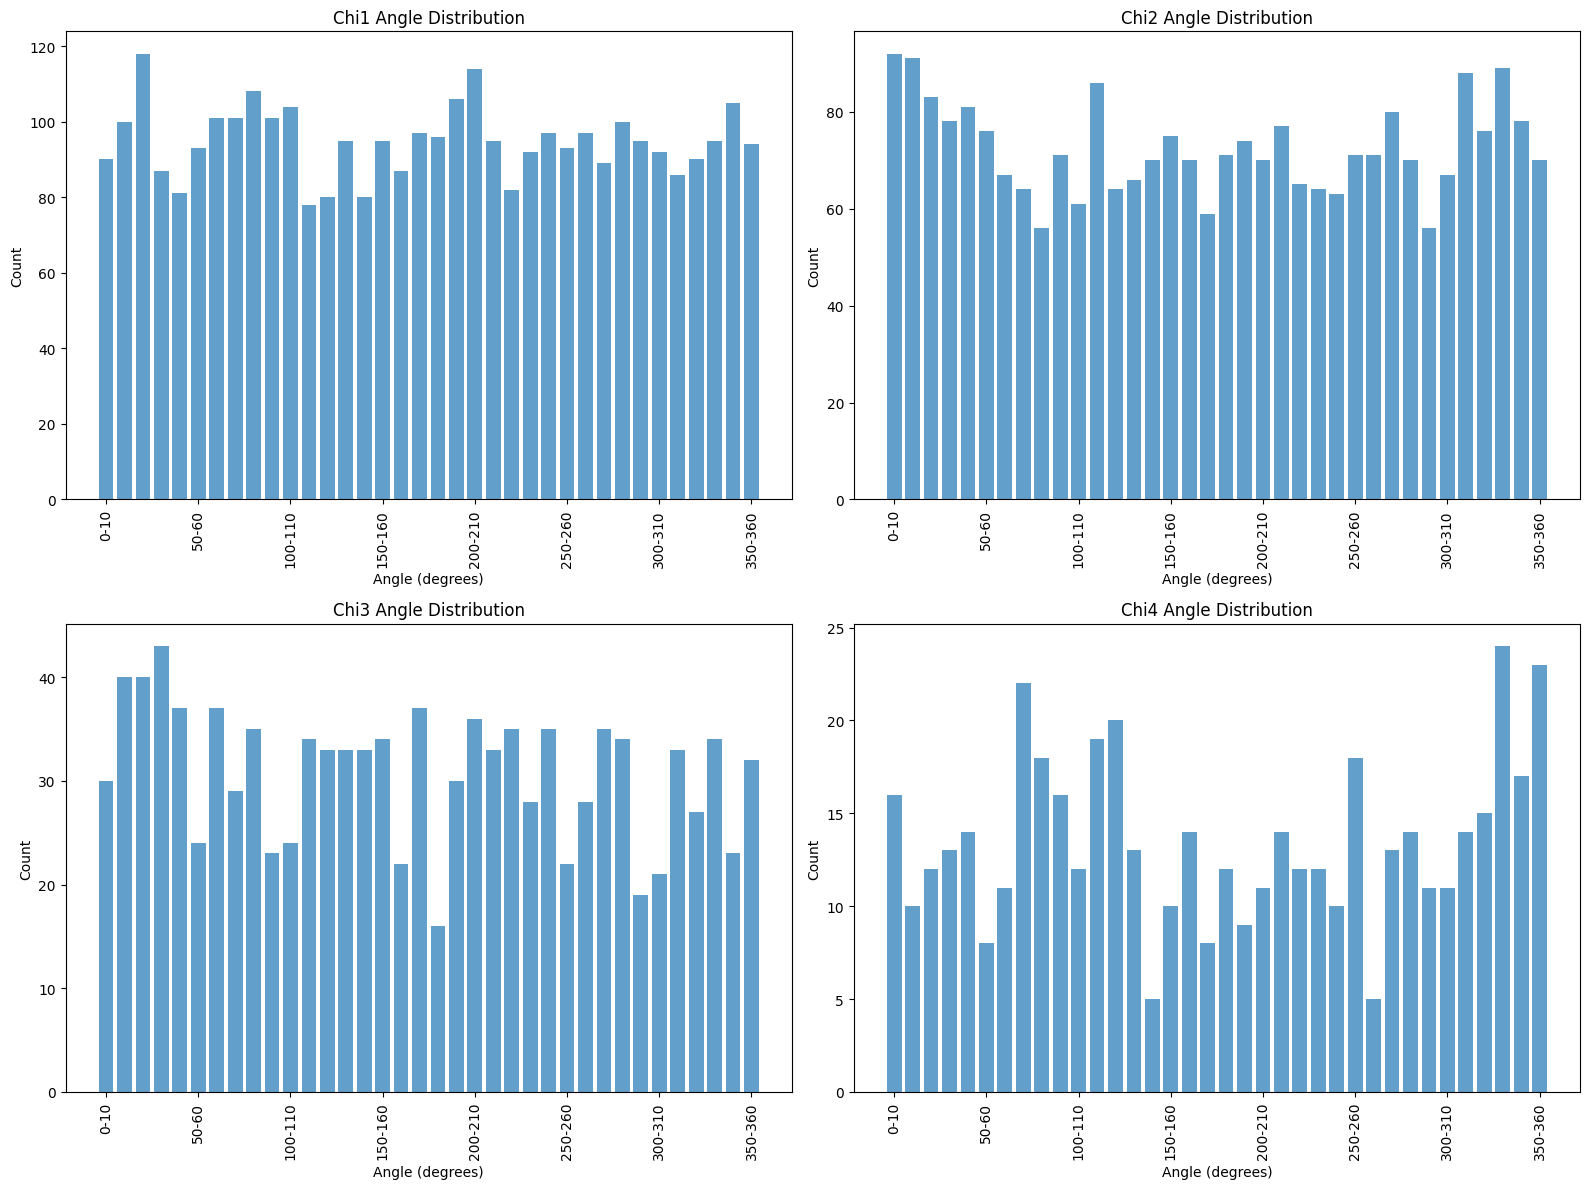

In [164]:
import json
import numpy as np
from Bio import PDB
import matplotlib.pyplot as plt

# 文件路径
directory = '/home/jiangdapeng/PepGLAD/results/no_condition_5samples/results.jsonl'

# 初始化计数器，记录chi角分布（chi1、chi2、chi3、chi4）
chi_counts = {f'chi{i}': [0] * 36 for i in range(1, 5)}  # 对应36个区间
total_counter = 0  # 统计处理的总蛋白质数量

def degrees(rad_angle):
    """将弧度角度转换为[0,360]范围内的角度"""
    if rad_angle is None:
        return None
    angle = rad_angle * 180 / np.pi
    while angle > 180:
        angle -= 360
    while angle < -180:
        angle += 360
    return angle + 180

# 解析文件
with open(directory, 'r', encoding='utf-8') as f:
    for line in f:
        # 跳过空行
        if line.strip():
            # 将每行解析为 JSON 对象
            json_object = json.loads(line)
            peptide_path = json_object['gen_pdb']
            peptide = json_object['gen_seq']
            if len(peptide)<5:
                continue
            total_counter += 1

            # 读取PDB文件
            parser = PDB.PDBParser(QUIET=True)
            structure = parser.get_structure('peptide', peptide_path)
            structure.atom_to_internal_coordinates()  # 初始化内部坐标
            chain = structure[0][json_object['lig_chain']]  # 假设只取第一个模型和指定的链
            
            # 遍历链中的残基，提取侧链角度
            for residue in chain.get_residues():
                res_name = residue.resname
                
                # 检查是否是标准氨基酸
                if res_name not in PDB.Polypeptide.standard_aa_names:
                    continue

                # 提取侧链二面角 chi1 到 chi4
                ic = residue.internal_coord  # 内部坐标
                if ic is None:
                    continue  # 如果内部坐标不存在，跳过该残基

                for chi_name in [f'chi{i}' for i in range(1, 5)]:
                    try:
                        chi_angle = ic.get_angle(chi_name)  # 获取侧链角度
                        if chi_angle is not None:
                            chi_deg = degrees(chi_angle)
                            chi_index = int(chi_deg // 10)  # 将角度归为区间
                            chi_counts[chi_name][chi_index] += 1
                    except KeyError:
                        continue  # 如果指定 chi 角不存在，跳过
                    except AttributeError:
                        print(f"AttributeError: Residue {res_name} has no internal coordinates")
                        continue

# 打印结果
print(f"Total samples processed: {total_counter}")
# for chi in chi_counts:
#     print(f"{chi} angle distribution: {chi_counts[chi]}")

# 可视化
bins = [f'{i*10}-{(i+1)*10}' for i in range(0, 36)]

fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs = axs.flatten()

for i, chi_name in enumerate(chi_counts):
    axs[i].bar(bins, chi_counts[chi_name], alpha=0.7)
    axs[i].set_title(f"{chi_name.capitalize()} Angle Distribution")
    axs[i].set_xlabel("Angle (degrees)")
    axs[i].set_ylabel("Count")
    axs[i].set_xticks(range(0, len(bins), 5))
    axs[i].set_xticklabels(bins[::5], rotation=90)

plt.tight_layout()
plt.show()

with_condition_chi_counts = chi_counts['chi1']+chi_counts['chi2']+chi_counts['chi3']+chi_counts['chi4']

100%|██████████| 93/93 [01:05<00:00,  1.41it/s]


Total samples processed: 4528


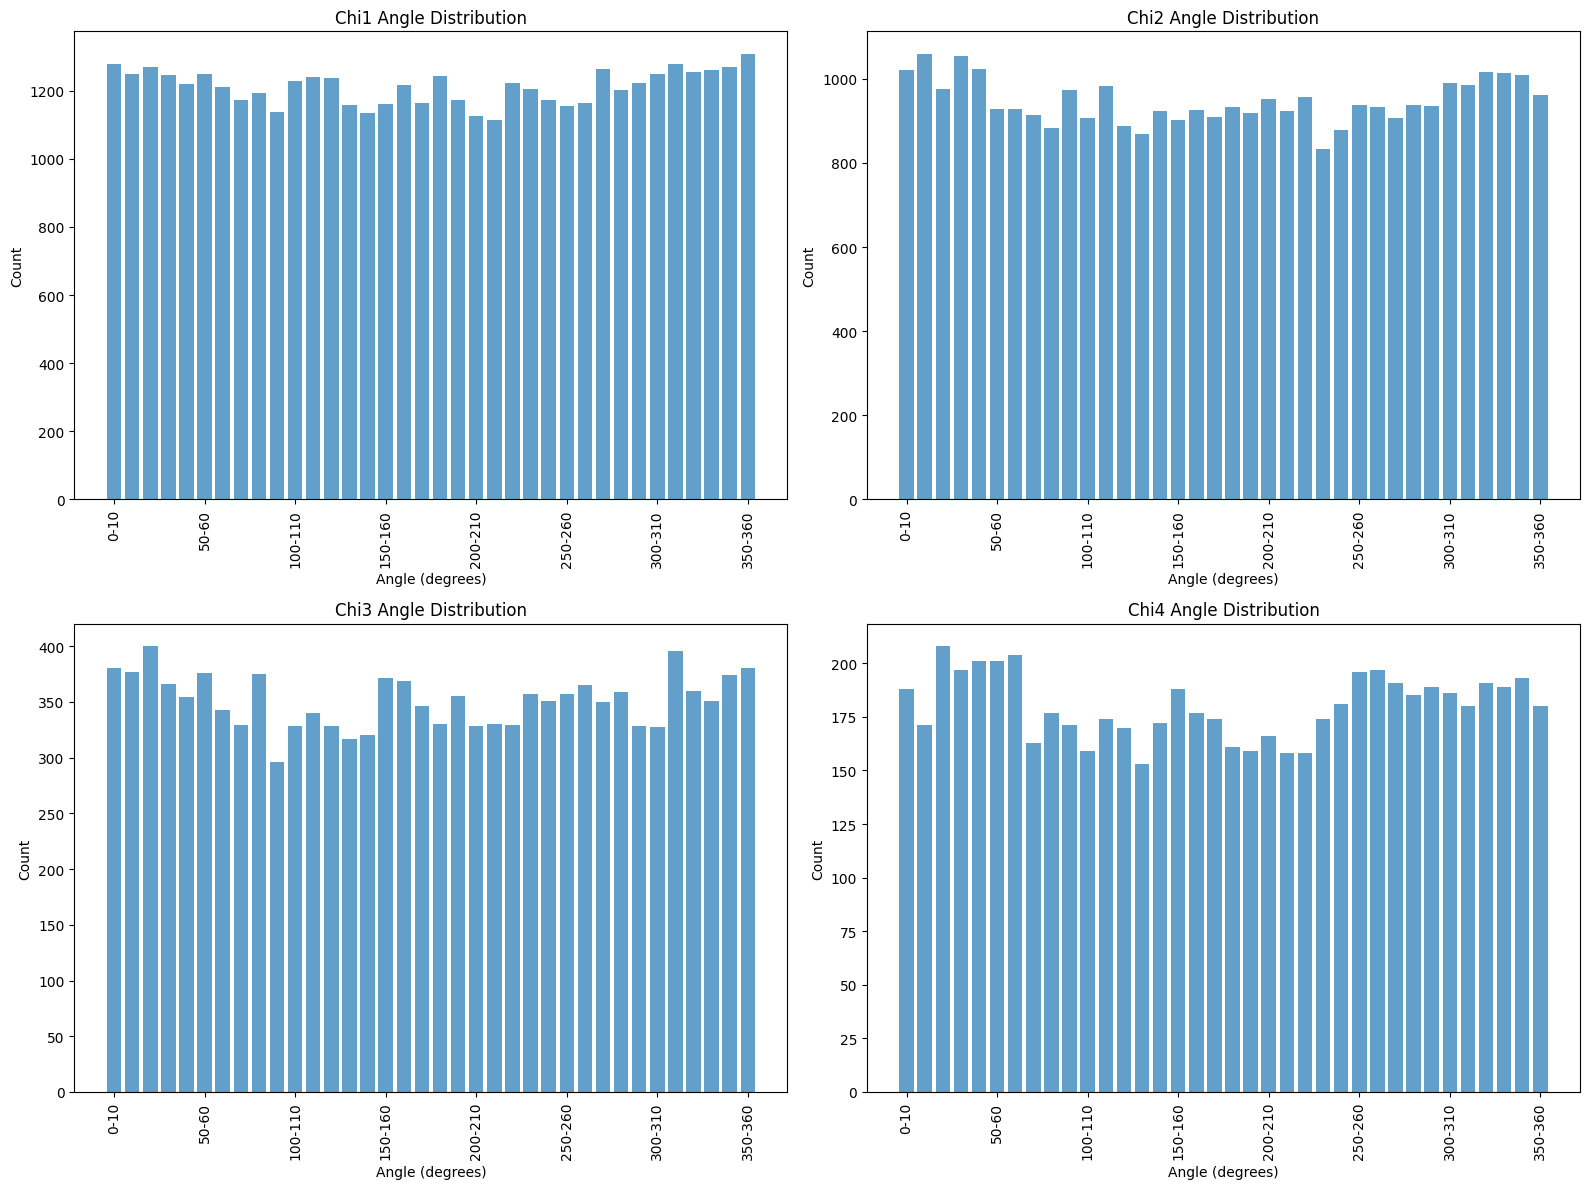

In [ ]:
import json
import numpy as np
from Bio import PDB
import matplotlib.pyplot as plt

min_length = 5

# 初始化计数器，记录chi角分布（chi1、chi2、chi3、chi4）
chi_counts = {f'chi{i}': [0] * 36 for i in range(1, 5)}  # 对应36个区间
total_counter = 0  # 统计处理的总蛋白质数量

def degrees(rad_angle):
    """将弧度角度转换为[0,360]范围内的角度"""
    if rad_angle is None:
        return None
    angle = rad_angle * 180 / np.pi
    while angle > 180:
        angle -= 360
    while angle < -180:
        angle += 360
    return angle + 180

file_path = '/data/private/jdp/PepGLAD/datasets/train_valid/all.txt'
df = pd.read_csv(file_path, sep='\t', header=None, names=['index', 'protein_id', 'peptide_id', 'label'])
df.set_index('index', inplace=True)

# 筛选 label 为 0 的行
df = df[df['label'] == 0]
for idx in tqdm(df.index):
    peptide_path = os.path.join('/data/private/jdp/PepGLAD/datasets/train_valid/pdbs', idx + '.pdb')
    if not os.path.exists(peptide_path):
        print(f"File not found: {peptide_path}")
        continue
    parser = PDBParser(QUIET=True)
    try:
        structure = parser.get_structure('peptide', peptide_path)
    except Exception as e:
        print(f"Error parsing {peptide_path}: {e}")
        continue
    peptide_id = df.loc[idx, 'peptide_id']
    try:
        chain = structure[0][peptide_id]
    except KeyError:
        print(f"Chain {peptide_id} not found in {peptide_path}")
        continue

    residues = list(chain.get_residues())
    if len(residues) < min_length:
        continue
    
    # 提取多肽链
    ppb = PDB.PPBuilder()
    polypeptides = ppb.build_peptides(chain)

    total_counter += 1
    structure.atom_to_internal_coordinates()  # 初始化内部坐标
    
    # 遍历链中的残基，提取侧链角度
    for residue in chain.get_residues():
        res_name = residue.resname
        
        # 检查是否是标准氨基酸
        if res_name not in PDB.Polypeptide.standard_aa_names:
            continue

        # 提取侧链二面角 chi1 到 chi4
        ic = residue.internal_coord  # 内部坐标
        if ic is None:
            continue  # 如果内部坐标不存在，跳过该残基

        for chi_name in [f'chi{i}' for i in range(1, 5)]:
            try:
                chi_angle = ic.get_angle(chi_name)  # 获取侧链角度
                if chi_angle is not None:
                    chi_deg = degrees(chi_angle)
                    chi_index = int(chi_deg // 10)  # 将角度归为区间
                    chi_counts[chi_name][chi_index] += 1
            except KeyError:
                continue  # 如果指定 chi 角不存在，跳过
            except AttributeError:
                print(f"AttributeError: Residue {res_name} has no internal coordinates")
                continue

file_path = '/data/private/jdp/PepGLAD/datasets/LNR/test.txt'
df = pd.read_csv(file_path, sep='\t', header=None, names=['index', 'protein_id', 'peptide_id', 'label'])
df.set_index('index', inplace=True)

# 筛选 label 为 0 的行
df = df[df['label'] == 0]
for idx in tqdm(df.index):
    peptide_path = os.path.join('/data/private/jdp/PepGLAD/datasets/LNR/pdbs', idx + '.pdb')
    if not os.path.exists(peptide_path):
        print(f"File not found: {peptide_path}")
        continue
    parser = PDBParser(QUIET=True)
    try:
        structure = parser.get_structure('peptide', peptide_path)
    except Exception as e:
        print(f"Error parsing {peptide_path}: {e}")
        continue
    peptide_id = df.loc[idx, 'peptide_id']
    try:
        chain = structure[0][peptide_id]
    except KeyError:
        print(f"Chain {peptide_id} not found in {peptide_path}")
        continue
    
    # 提取多肽链
    ppb = PDB.PPBuilder()
    polypeptides = ppb.build_peptides(chain)

    total_counter += 1
    structure.atom_to_internal_coordinates()  # 初始化内部坐标
    
    # 遍历链中的残基，提取侧链角度
    for residue in chain.get_residues():
        res_name = residue.resname
        
        # 检查是否是标准氨基酸
        if res_name not in PDB.Polypeptide.standard_aa_names:
            continue

        # 提取侧链二面角 chi1 到 chi4
        ic = residue.internal_coord  # 内部坐标
        if ic is None:
            continue  # 如果内部坐标不存在，跳过该残基

        for chi_name in [f'chi{i}' for i in range(1, 5)]:
            try:
                chi_angle = ic.get_angle(chi_name)  # 获取侧链角度
                if chi_angle is not None:
                    chi_deg = degrees(chi_angle)
                    chi_index = int(chi_deg // 10)  # 将角度归为区间
                    chi_counts[chi_name][chi_index] += 1
            except KeyError:
                continue  # 如果指定 chi 角不存在，跳过
            except AttributeError:
                print(f"AttributeError: Residue {res_name} has no internal coordinates")
                continue

# 打印结果
print(f"Total samples processed: {total_counter}")
# for chi in chi_counts:
#     print(f"{chi} angle distribution: {chi_counts[chi]}")

# 可视化
bins = [f'{i*10}-{(i+1)*10}' for i in range(0, 36)]

fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs = axs.flatten()

for i, chi_name in enumerate(chi_counts):
    axs[i].bar(bins, chi_counts[chi_name], alpha=0.7)
    axs[i].set_title(f"{chi_name.capitalize()} Angle Distribution")
    axs[i].set_xlabel("Angle (degrees)")
    axs[i].set_ylabel("Count")
    axs[i].set_xticks(range(0, len(bins), 5))
    axs[i].set_xticklabels(bins[::5], rotation=90)

plt.tight_layout()
plt.show()

no_condition_chi_counts = chi_counts['chi1']+chi_counts['chi2']+chi_counts['chi3']+chi_counts['chi4']

In [166]:
kl_div = kl_divergence(no_condition_chi_counts, with_condition_chi_counts)
print(f"KL Divergence: {kl_div}")

KL Divergence: 0.01260295313943724


In [19]:
import torch
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# 假设你有一个包含20个torch tensor的列表，维度为 (embedding_dim,)
embeddings_tensor = torch.cat(output_list,dim=0)  # 转换为矩阵 (20, embedding_dim)

# # 使用PCA降维到2D
# pca = PCA(n_components=2)
# embeddings_2d = pca.fit_transform(embeddings_tensor.cpu().detach().numpy())

# 如果想使用t-SNE，也可以使用以下代码代替PCA：
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings_tensor.cpu().detach().numpy())

# 绘制散点图
plt.figure(figsize=(10, 8))
for i in range(20):
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], label=f"{i+1}子结构")
    plt.text(embeddings_2d[i, 0], embeddings_2d[i, 1], f"{i+1}", fontsize=9)

plt.title("蛋白质子结构的Embedding分布")
plt.xlabel("降维后的第1主成分")
plt.ylabel("降维后的第2主成分")
plt.legend(title="子结构数量", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

ValueError: perplexity must be less than n_samples

In [ ]:
import mdtraj as md
import numpy as np

file_name = '/home/jiangdapeng/PepGLAD/output/codesign/1ssc_A_B_5.pdb'

# Load the PDB file and select chain B
traj = md.load(file_name)
topology = traj.topology
chain_B_atoms = topology.select("chainid == 1")  # 通常 PDB 文件中的链从 0 开始编号，这里假设链B的编号为1

# Slice the trajectory to only include chain B
traj_chain_B = traj.atom_slice(chain_B_atoms)

# Compute secondary structure for chain B
pdb_ss = md.compute_dssp(traj_chain_B, simplified=False)[0]  # (L, )

# Count the secondary structure elements
ss_count = {
    'alpha': np.sum(pdb_ss == 'H'),
    'beta': np.sum(pdb_ss == 'E'),
}

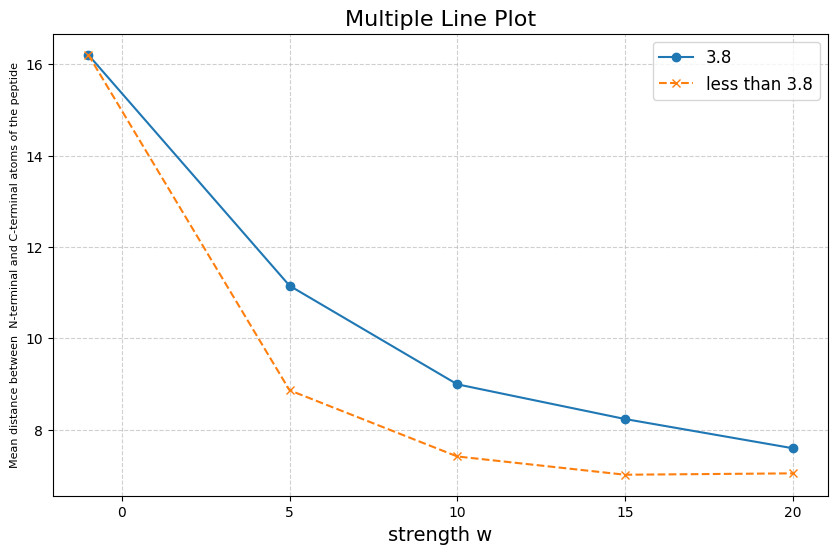

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# 示例数据
x = [-1,5,10,15,20] # x 轴数据
y1 =[16.21,11.15,8.99,8.23,7.59]  # 第一条折线数据
y2 = [16.21,8.86,7.41,7.01,7.04]  # 第二条折线数据
# y3 = np.sin(x) + np.cos(x)  # 第三条折线数据

# 创建图表
plt.figure(figsize=(10, 6))

# 绘制多条折线
plt.plot(x, y1, label='3.8', linestyle='-', marker='o')
plt.plot(x, y2, label='less than 3.8', linestyle='--', marker='x')
# plt.plot(x, y3, label='y = sin(x) + cos(x)', linestyle='-.', marker='s')

# 添加标题和标签
plt.title('Multiple Line Plot', fontsize=16)
plt.xlabel('strength w', fontsize=14)
plt.ylabel('Mean distance between  N-terminal and C-terminal atoms of the peptide', fontsize=8)

# 添加图例
plt.legend(fontsize=12)

# 显示网格
plt.grid(True, linestyle='--', alpha=0.6)

# 显示图表
plt.show()


In [5]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import os
os.environ["TRANSFORMERS_CACHE"] = "/path/to/your/cache_dir"
model_name = "Qwen/Qwen2.5-1.5B-Instruct"
# 设置 Hugging Face 的 API 端点镜像
cache_dir = '/data/private/jdp'
os.environ["HF_ENDPOINT"] = "https://hf-mirror.com"
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    torch_dtype="auto",
    device_map="auto",
    cache_dir = cache_dir
)
tokenizer = AutoTokenizer.from_pretrained(model_name)

prompt = "Give me a short introduction to large language model."
messages = [
    {"role": "system", "content": "You are Qwen, created by Alibaba Cloud. You are a helpful assistant."},
    {"role": "user", "content": prompt}
]
text = tokenizer.apply_chat_template(
    messages,
    tokenize=False,
    add_generation_prompt=True,
    cache_dir = cache_dir
)
model_inputs = tokenizer([text], return_tensors="pt").to(model.device)

generated_ids = model.generate(
    **model_inputs,
    max_new_tokens=512
)
generated_ids = [
    output_ids[len(input_ids):] for input_ids, output_ids in zip(model_inputs.input_ids, generated_ids)
]

response = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]

OSError: We couldn't connect to 'https://huggingface.co' to load this file, couldn't find it in the cached files and it looks like Qwen/Qwen2.5-1.5B-Instruct is not the path to a directory containing a file named config.json.
Checkout your internet connection or see how to run the library in offline mode at 'https://huggingface.co/docs/transformers/installation#offline-mode'.